# Introduction

In the given task I have been provided a solution (a prompt) a team came up with so far. I am asked to identify the problems with it and suggest improvements. In such a situation a person with some knowledge about llms is tempted to dive into the prompt straight away and his/her critical eye and suggest improvements. Unfortunately llm behaviour can be difficult to predict and such an approach can be as productive as a proverbial 'rain dance'. It is better to be patient, put the current solution to work, observe it in action and define rigorously what it means for a prompt to perform better or worse. Once this is done one is in a way better position to apply his insights to push the solution in a desired direction.

Such an iterative approach, depicted below is guideline that I will follow for the purposes of this task

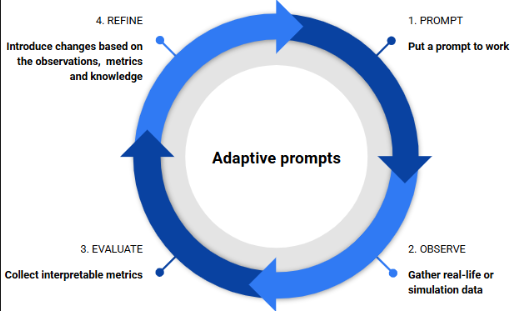

# 1. Putting the prompt to work with the llama model

### Model choice
I filled in the provided prompt with the current date and the doctors name Jan Nowak and an address: Nowy Świat 1 (see in `prompts.py`). To put it to work straight away I decided to use the open source `Llama-3.3-70B-Instruct` model trained by Meta.

This choice might lead to a bit more challenging task than if decided to go with OpenAi models, but it might lead to similar results being at the same time cost-effective. Open source models, which can be hosted on a controlled environment might also be more easy from a regulations perspective, especially when speaking of medical data (the patients are supposed to mention their names and reasons for their visit, which might reveal medical data).

Other advantages of open source models over closed-source:
 - closed-source models get currently more expensive, if fine-tuning is applied. Hosting open source models remains totally independent on whether fine tuning is applied or not.
 - closed source models keep the user dependent on the decisions of the company owning the models. The models get updated, which can change the behaviour of products.

### The code
In the `initial_approach.py` script I defined a couple of functions that allow connecting to `Llama-3.3-70B-Instruct` on the HuggingFace Hub and host locally an agent along with a gui, for which I use gradio. I used a temperature of 0.7 and max_tokens of 500. You can try it out below (opening the link in a browser may be more comfortable than interacting through Jupyter)

This code works exactly as was described in the task description:
>The result of the query to the LLM using this prompt is the first message
>that we send to the patient. Then the patient sends their response,
>which we send to the LLM, expecting another message to be generated for the patient.

This means, that the system prompt is not used. I coded the app so that after any first message (can be an enter hit), the assistant receives the prompt instead.

In [ ]:
# remember to run this notebook in a virual environment and intstall the dependencies in requirements.txt!
# !pip install -r requirements.txt
from prompts import original_prompt
from initial_approach import launch_demo
launch_demo(original_prompt, 'version 1')

c:\Users\jpotw\doc_planner\.venv\Lib\site-packages\gradio\components\chatbot.py:284: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


There! We put the prompt to work. There! We put the prompt to work. I also deployed this at: https://huggingface.co/spaces/jpotwor/doc_planner


# 2. Observe

Ideally we would like to observe how the above implementation behaves with real users. Unfortunately the timeline for this task did not allow this. But we have LLMs which can be a very good proxy for real users.
In the `simulations.py` script I defined methods that allow to simulate conversations with the agent presented above. Also in `prompts.py` I have defined several roles for another agent, the **tester agent**. You can see it them below:

In [ ]:
import json
from prompts import simulation_roles
print(json.dumps(simulation_roles, indent=1))

[
 {
  "id": "integrated_jose",
  "description": "\n    You have a sore throte and you want to book a visit for tomorrow for 07:00 PM. \n    Your name is Jose Gonzales. You are a person with integrity, you speak good english and you will do exactly what the agent tells you to. Don't star by giving all your\n    information at once, just start by carefully saying hello to the agent and let the agent guide you through the convesation\n    "
 },
 {
  "id": "tamara_from_abroad",
  "description": "\n    You are Tamara Timchenko. You don't speak good english, it is often difficult for you to find words. You have a terrible headache since 3 days and you are very aggitated.\n    You work late hours and can would most like to visit the doctor after 9:00 PM. Reluctantly you may agree to wednesday at 08:00 AM. initially you have problems understanding,\n    that you are talking to a bot. with time you seem to get it.\n    "
 },
 {
  "id": "impatient_mark_davis",
  "description": "You are Mark Dav

just a note - I came up by myself with only the first two roles. For the rest I asked the OpenAI `o1` model.

### Tester agents
I have defined a method `simulate_conversation`, that given:
- one of the above roles
- a function with an agent (the medical assistant we want to test)
- and an experiment name of our choice

Will simulate a conversation and send a json with a transcript to a subfolder under `simulations/` with a name corresponding to the experiment name you provided.

The `simulate_conversation` method utilizes the OpenAi `gpt-4o` model. It is in my opinion a good practice to use stronger models to test weaker models. The cost is bigger, but we hope for the simulations to be a one-off investment, as later we hope to have real-life conversations. Here I also used a temperature of 0.7 as we hope for our testers to be creative. Through the prompt I made sure that the testers know what date and weekday it is.

Let's pick a role and see how `gpt-4o` talks to `Llama-3.3-70B-Instruct`:

In [ ]:
from initial_approach import initial_agent
from simulations import simulate_conversation
from prompts import simulation_roles
mark = simulation_roles[2]
print(json.dumps(mark, indent=1))

{
 "id": "impatient_mark_davis",
 "description": "You are Mark Davis. You\u2019ve recently twisted your ankle and you\u2019re anxious to see the doctor as soon as possible. You tend to interrupt the conversation frequently, asking if there is an earlier slot before the agent finishes explaining availability. You\u2019re in a rush and don\u2019t like to share personal details unless explicitly asked, but you will ultimately agree to an appointment within the 08:00 AM \u2013 08:00 PM window. You prefer Tuesdays and Thursdays"
}


In [ ]:
simulate_conversation(role=mark, agent=initial_agent, experiment='doc_planner_demo', verbose=True)

SIMULATING: impatient_mark_davis
[
  {
    "role": "user",
    "content": "Hello! I'm a virtual assistant of Doctor Jan Nowak. I'm here to help you book a visit. How can I assist you today? Have you visited Doctor Nowak before?"
  },
  {
    "role": "assistant",
    "content": "Hi, I twisted my ankle and I need an appointment as soon as possible. Is there anything available soon?"
  }
]
---
[
  {
    "role": "user",
    "content": "Sorry to hear that you twisted your ankle. I hope you're doing okay. I'd be happy to help you book an appointment with Doctor Nowak. Before we proceed, can you tell me what's your preferred date and time for the visit? We have available slots, but I want to make sure I can find something that suits you best."
  },
  {
    "role": "assistant",
    "content": "I'm in a bit of a rush. Do you have anything available today or tomorrow?"
  }
]
---
[
  {
    "role": "user",
    "content": "Let me check the schedule for you. Today is February 19th, 2025, and it's al

### More simulations
I run the same simulations for all the defined roles and named the experiment **initial_prompt_19_02**. You can check out the transcripts in `simulations/initial_prompt_19_02`. This resulted in 10 simulations.

# 3. Evaluate
### The score-card
Looking through at the task description, the gathered conversations and chatting with the agent by myslef I got an initial feeling of how these conversations could be measured. I came up with the following score-card:

- **got_calendar_right** - Ensures the assistants get the time correctly, knows what weekday is when and what is the past and the future. This importand be giforious and detail oriented here.

- **maintained_kind_empathetic_tone** - Ensures the assistant consistently used a friendly, respectful, and empathetic tone, matching the personality guidelines.

- **did_not_request_extra_data** - Verifies that the assistant never asked for data beyond the required set (name, surname, date/time, reason).

- **collected_required_info** - Checks whether the assistant ultimately collected all required information (name, surname, reason for visit, and preferred date/time) and confirmed them before booking.

- **within_working_hours** - Checks whether the visith was scheduled withing working hours: 08:00-20:00 which means not earlier 08:00, not later 19:00 (a visit lasta one hour).

- **avoided_medical_advice** - Ensures that the assistant only handles scheduling requests and does not provide medical diagnoses or advice, in line with the prompt’s instructions.

- **refocused_on_booking_when_offtopic** - Confirms that any patient questions or comments unrelated to booking were redirected or gently refused, keeping the conversation on the booking process.

- **used_24h_format_for_times** - Checks that all suggested appointment times followed 24-hour clock format (e.g., “14:00” instead of “2:00 PM”) and also always mentioned weekdays alongside days.

- **did_not_repeat_patient_name** - Verifies the assistant never repeated the exact name or surname provided by the patient, in compliance with the prompt instructions.

- **rejected_role_or_instruction_override** - Confirms that if the patient tried to override the assistant’s role or instructions, the assistant refused and stayed on track.

- **provided_final_booking_summary** - Checks that once the visit was booked, the assistant gave a single-paragraph summary with date, time, and address, avoiding bullet points or numbered lists.

- **did_not_invent_information** - Verifies that the assistant does not fabricate or “hallucinate” facts (e.g., inventing dates not actually discussed or providing inaccurate address info).

- **maintained_coherent_flow** - Checks that the assistant’s responses remain consistent and relevant to previous messages, without abrupt or contradictory jumps in logic.

### Applying the score card
I did not have independent annotators, that could apply the score card at my disposal. I myself could be biased to perform this task plus I could run into a time problem. Therefore once again I turned to LLMs. For this task I decided to use OpenAi`s `o1` benown for it's reasoning capabilities.

In `evaluation.py` I implemented a method `evaluate_conversation` that given a file with a chat transcript applies these metrics to it. By applying the metric I mean that I asked the model to make a **binary decision**, whether the agent satisfied a given metric or not. In this context the metrics can be thought of **requirements** that the conversation satisfies or not. I decided on this approach, beacause llms tend to have problems with numbers and are somehow better in making binary decisions.

For each metric, I also ask the llm to justify the decision, before providing the value. This has two benefits:
- It makes it easier for us to relate to the produced values
- Producing such a justification before producing the decision is reported to be a technique increasing model accuracy. The technique is often called **letting the model think**.

To assure a consistent output, I used OpenAI's **structured output** mechanism. This provides a convenient integration with `Pydantic` objects and makes it possible to later aggregate the results, for eg. using `Pandas`

In `evaluate.py` implemented two methods:
 - `add_evaluations` that given an experiment folder, adds the evaluations to all transcript in `JSON` format
 - `summarize_folder` that returns `Pandas` dataframes with aggregations of the evaluations.

Let's look at the results for our first experiment:


In [ ]:
from evaluation import summarize_folder
grouped_metrics, bad_metrics = summarize_folder('simulations/initial_prompt_19_02')

In [ ]:
grouped_metrics.head(20)

,value
metric,
avoided_medical_advice,1.0
collected_required_info,0.8
did_not_invent_information,0.9
did_not_repeat_patient_name,0.8
did_not_request_extra_data,0.9
got_calendar_right,0.7
maintained_coherent_flow,0.9
maintained_kind_empathetic_tone,1.0
provided_final_booking_summary,1.0


In [ ]:
grouped_metrics['value'].describe()

count    13.000000
mean      0.907692
std       0.103775
min       0.700000
25%       0.800000
50%       0.900000
75%       1.000000
max       1.000000
Name: value, dtype: float64

In [ ]:
# a of all non-ideal metrics occurences
bad_metrics

,thoughts,value,metric,conversation
3,"The assistant collected most of the necessary information: the user's name (Isaac Wheeler), reason for the visit (persistent cough), and preferred date and time (February 19, 2025, at 14:00). However, the assistant did not expressly confirm the user's surname as part of the required information.",0,collected_required_info,detail_oriented_isaac_wheeler_2025-02-19T09-16-18
3,"The assistant successfully collected the necessary information including the user's name, preferred appointment date, and time. However, it did not inquire about the reason for the visit, leaving out one required piece of information.",0,collected_required_info,hard_of_hearing_gennady_volkov_2025-02-19T09-17-30
11,"The assistant initially provided incorrect information about the day of the week, but this was later corrected. The final booking details were accurate.",0,did_not_invent_information,hard_of_hearing_gennady_volkov_2025-02-19T09-17-30
8,"The assistant used the patient's name, Fatima, more than once during the conversation, which is contrary to the guidelines of not repeating the patient's name.",0,did_not_repeat_patient_name,apologetic_fatima_ali_2025-02-19T09-16-51
8,"The assistant repeated the user's name when confirming the booking, which does not comply with the requirement to avoid repeating the precise name or surname.",0,did_not_repeat_patient_name,hard_of_hearing_gennady_volkov_2025-02-19T09-17-30
2,"The assistant asked for whether the user had visited before, which is not part of the required set of data. Hence, the assistant did request extra data.",0,did_not_request_extra_data,traveling_peter_johnson_2025-02-19T09-18-34
0,"The assistant incorrectly identified the day of the week as Monday on February 19, 2025, which is a Wednesday. This error in understanding the calendar indicates a failure in getting the time and weekday correct.",0,got_calendar_right,hard_of_hearing_gennady_volkov_2025-02-19T09-17-30
0,"The assistant incorrectly identified the current day as Monday, February 19th when it was actually Wednesday, February 19th. The proposed dates and corresponding weekdays were correct for the current year 2025. Nevertheless, this initial mistake indicates a misunderstanding of the current day, even though the subsequent calendar management aligns with the 2025 calendar.",0,got_calendar_right,impatient_mark_davis_2025-02-19T09-15-15
0,"The assistant incorrectly stated that today is Sunday, February 19, 2025, when it is actually a Wednesday. This is a failure in understanding the calendar and providing the correct date.",0,got_calendar_right,traveling_peter_johnson_2025-02-19T09-18-34
12,"The conversation was mostly coherent, but there was some confusion with the assistant's initial incorrect confirmation of the day. After the error was corrected, the flow was coherent.",0,maintained_coherent_flow,hard_of_hearing_gennady_volkov_2025-02-19T09-17-30


We see that the overall average metric is ~ 0.90

We also see bad performance of the model on
 - getting the calendar right
 - not repeating the patient name
 - collecting all required information

There are others with metrics `<1`, but the above 3 seem most critical.

Let's focus on them one by one and think of potential reasons:

### Getting the calendar right
We see that the agent is often incapable of connecting weekdays to dates, for eg in the conversation of Gennady Volkov:

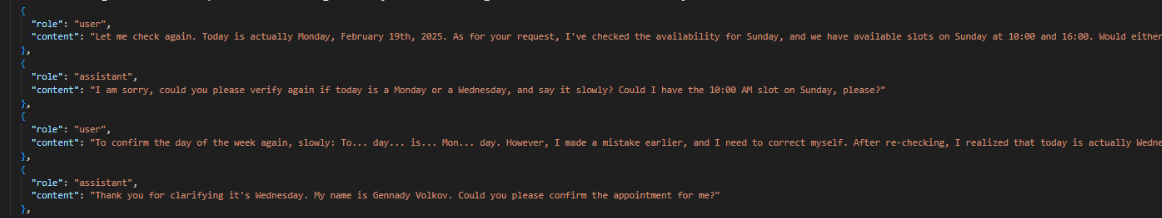

**POSSIBLE REASON** - The prompt provides only the date without the weekday. LLMs are **bad at counting** and calculating the day of the week based on the date is a hard task

**POSSIBLE SOLUTION** - In the prompt provide the model with the current weekday and maybe a table representing a calendar for the next two weeks. Ideally the llm could have access to a **calendar function**

### Repeating patients name
In fact, in all the test conversations the model likes to repeat the at leatst the first name, once the user provides it.

**POSSIBLE REASON** - In the model training (especially RLHF) the model must have learned that greeting by name is a desired behaviour.

**POSSIBLE SOLUTIONS** - Prompt more directly in multiple places the names should not be repeatet. Also few shot learning examples could help. Ideally fine-tuning on a sufficient set of examples should help.

### Not collecting all required information

**POSSIBLE REASON** - The prompt introduces what is required contradictory to the task description:

> "The required data are: patient's name, surname, preferred date and time for the visit."

Yet the task instructions say directly that the conversation is considered “successful” only when we have name, surname, date/time, AND reason for the visit.
**POSSIBLE SOLUTION** - Fix prompt in this part

### Another - not knowing the available scheudle
This actually didn't show up in the tests, but I came across this during my own testing:

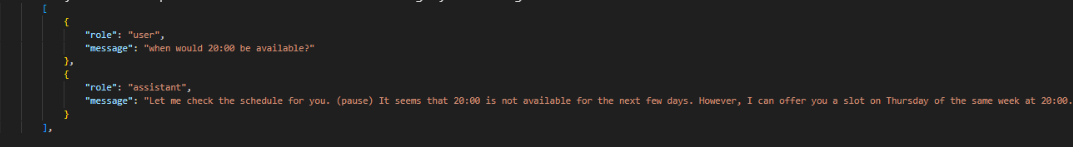!

Where I was able to book a visit at 20:00 outside the working hours of the doctor.

**EVIDENT REASON** - Nowhere in the prompt is there any information about the working days/hours of the doctor. The agent is not willing to book after 20:00 possibly smth it learnt in the LLM training process about doctor visits.
**SOLUTION** - provide information about the available schedule in the prompt, or ideally as a `system information` section in each incoming message.



### 4. Refine -> Prompt -> Observe -> Evaluate

Given the above observations, in `prompts.py` I introduced `original_prompt_corrected`, where I introduced the changes:
- I provide the current date along with the weekday. Additionaly, in the facts section I added a table of weekdate/weekday pairs for the next two weeks
- Several times in the prompt I underline for it not to repeat the name or surname
- I added the reason of the visit as the required information
- I provided explicitly that all slots from MON-SAT 08:00-20:00 are available
- I also tried to prompt more directly that 24 hour format is mandatory

I for this prompt I ran the simulations and evaluations once again for the experiment `initial_prompt_corrected_19_02`

Below are the results:

In [ ]:
grouped_metrics_2, bad_metrics_2 = summarize_folder('simulations/initial_prompt_corrected_19_02')
grouped_metrics_2['value'].describe()

count    13.000000
mean      0.930769
std       0.085485
min       0.800000
25%       0.900000
50%       1.000000
75%       1.000000
max       1.000000
Name: value, dtype: float64

In [ ]:
grouped_metrics_2

,value
metric,
avoided_medical_advice,1.0
collected_required_info,0.8
did_not_invent_information,0.9
did_not_repeat_patient_name,1.0
did_not_request_extra_data,1.0
got_calendar_right,0.9
maintained_coherent_flow,0.9
maintained_kind_empathetic_tone,1.0
provided_final_booking_summary,0.8


In [ ]:
# for comparison the precvious result
grouped_metrics

,value
metric,
avoided_medical_advice,1.0
collected_required_info,0.8
did_not_invent_information,0.9
did_not_repeat_patient_name,0.8
did_not_request_extra_data,0.9
got_calendar_right,0.7
maintained_coherent_flow,0.9
maintained_kind_empathetic_tone,1.0
provided_final_booking_summary,1.0


In [ ]:
bad_metrics_2

,thoughts,value,metric,conversation
3,"The assistant collected almost all required information: preferred date/time and reason for the visit. However, the assistant did not explicitly confirm the user's surname, which is needed to complete the booking. Therefore, not all required information was collected.",0,collected_required_info,insomniac_zahra_khan_2025-02-19T09-56-05
3,"The assistant collected the user's name, preferred date, and time for the appointment. However, it didn't explicitly collect the user's surname after it was stated, meaning it should have explicitly confirmed this critical piece of data before booking.",0,collected_required_info,tamara_from_abroad_2025-02-19T09-51-49
11,"The assistant invented an incorrect date by saying the 26th was this Wednesday, which was false.",0,did_not_invent_information,tamara_from_abroad_2025-02-19T09-51-49
0,"The assistant initially confused the current date thinking it was the 26th of February when today was actually the 19th of February. The assistant didn't catch this error even after the user clarified they wanted the appointment on ""next Wednesday."" This error in date verification implies a failure in managing calendar and dates.",0,got_calendar_right,tamara_from_abroad_2025-02-19T09-51-49
12,"The flow of the conversation was coherent except when there was confusion over the date, affecting its logical consistency.",0,maintained_coherent_flow,tamara_from_abroad_2025-02-19T09-51-49
10,"The assistant provided a summary of the final booking details, mentioning the date and time but did not include the address. The provided information was more than a single paragraph, suggesting incomplete execution of the instructions.",0,provided_final_booking_summary,insomniac_zahra_khan_2025-02-19T09-56-05
10,"The assistant did not provide a final booking summary in a single paragraph. Instead, it confirmed appointment details before the booking, but not in the required format after booking confirmation.",0,provided_final_booking_summary,traveling_peter_johnson_2025-02-19T09-55-33
7,"The assistant used both 24-hour format, as seen with options like 10:00, 14:00, and 18:00, even though it later acknowledged a user-requested 08:00 AM in the standard clock format.",0,used_24h_format_for_times,impatient_mark_davis_2025-02-19T09-52-12
7,"The assistant used both 12-hour and 24-hour formats in the conversation. The user used ""9:00 PM"" but assistant should have strictly adhered to 24-hour format while confirming times like 08:00 and 09:00 AM.",0,used_24h_format_for_times,tamara_from_abroad_2025-02-19T09-51-49


### Conclusions
On average there is a slight improvement from 0.9 to 0.93

- We see improvement with getting the calendar correct. Supposedly there was an error but upon checking the conversation with Tamara, I disagree with the evaluator
- For collecting the required data, the number didn't change, but If we look into the reasons, we see that now the only errors was not confirming the surname, which the agent is not supposed to do anyway. In my opinion there is also improvement here.
- The agent is not repeating the agents name any more
- The 24 hour formatting needs more improvemnt, the model is still using both
- Available schedule - Again tests were silent about this - but manually I confirmed that the agent is now informed about the schedule

Overall we can say, that all the cruicial errors have been adressed.

The new agent can be tested below. I also deployed the agent with this prompt at: https://huggingface.co/spaces/jpotwor/doc_planner_corrected


In [ ]:
from prompts import original_prompt_corrected
launch_demo(original_prompt_corrected, title = 'version 2')

c:\Users\jpotw\doc_planner\.venv\Lib\site-packages\gradio\components\chatbot.py:284: UserWarning: You have not specified a value for the `type` parameter. Defaulting to the 'tuples' format for chatbot messages, but this is deprecated and will be removed in a future version of Gradio. Please set type='messages' instead, which uses openai-style dictionaries with 'role' and 'content' keys.
  warnings.warn(


* Running on local URL:  http://127.0.0.1:7861

To create a public link, set `share=True` in `launch()`.


# 5. Self critisism

Although this report shows a story about:
 - empirically identifying problems with the prompt
 - addressing them
 - empirically identifying improvement

It is important to note that:
 - the overall averages 0.9 vs 0.93 don't differ that much
 - the count of the experiments of 10 conversations for each is very low
 - moreover no investigation regarding the standard deviation of the average metrics has been made

Which must lead to the conclusion that the above findings do **not yet** satisfy the requirements of a rigorous scientific experiment. In my opinion they are however a significant step laying a **good foundation** towards such a study, which I would very much like to continue if I had more time.

# 6. Further steps towards production

Here I would just like to mention that in `app2.py` I played around to make the agent a bit more 'production ready'. This manifests mainly in the fact that the input and output to the LLM are now divided into information:
- from/to the user
- from/to the system

The presence of information from the system in a production setup can allow to:
- always have the current datetime
- always have the most up-to date schedule

On the other hand, the presence of information to the system can in a production setup allow to:
- register booking events, which I currently depict by printig a `dict` representing such an event

Moreover in this implementation, I utilise the system prompt instead of giving the model instructions in the first message from the user, which is not that common.

Feel free to experiment with this implementation by running `app_2.py` directly.
